In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
original_img=plt.imread(r'C:\Users\varad\OneDrive\Desktop\datasets\AndreNg\GalrbETX0AYpVEW (1).png')

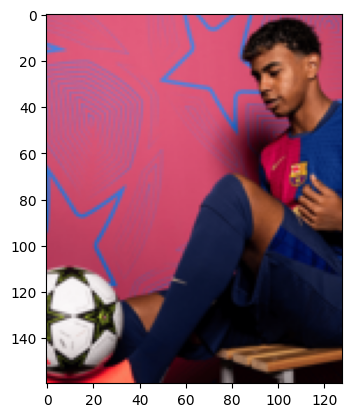

In [3]:
plt.imshow(original_img)

In [4]:
original_img.shape

(160, 128, 3)

In [5]:
original_img=original_img[:,:,:3]

In [6]:
original_img

array([[[0.7490196 , 0.36078432, 0.5411765 ],
        [0.7607843 , 0.35686275, 0.5294118 ],
        [0.79607844, 0.34901962, 0.5058824 ],
        ...,
        [0.64705884, 0.3137255 , 0.5019608 ],
        [0.6117647 , 0.31764707, 0.5137255 ],
        [0.7882353 , 0.25882354, 0.3882353 ]],

       [[0.84313726, 0.3254902 , 0.4627451 ],
        [0.827451  , 0.3372549 , 0.4862745 ],
        [0.79607844, 0.34901962, 0.5137255 ],
        ...,
        [0.77254903, 0.27058825, 0.40784314],
        [0.6156863 , 0.3254902 , 0.5294118 ],
        [0.6627451 , 0.3019608 , 0.48235294]],

       [[0.76862746, 0.35686275, 0.5254902 ],
        [0.8       , 0.34901962, 0.5019608 ],
        [0.8352941 , 0.33333334, 0.47843137],
        ...,
        [0.6627451 , 0.30588236, 0.49019608],
        [0.76862746, 0.2784314 , 0.41960785],
        [0.5882353 , 0.3372549 , 0.5529412 ]],

       ...,

       [[0.31764707, 0.00784314, 0.0627451 ],
        [0.25490198, 0.00392157, 0.05490196],
        [0.24705882, 0

In [7]:
def find_closest_centroids(x,centroids):
    m=x.shape[0]
    n=x.shape[1]
    k=centroids.shape[0]
    idx=np.zeros(m)
    for i in  range(m):
        dist=np.sum((x[i]-centroids[0])**2)
        for j in range(1,k):
            new_dist=np.sum((x[i]-centroids[j])**2)
            if dist<new_dist:
                pass
            else:
                dist=new_dist
                idx[i]=j 
    return idx

In [8]:
def move_centroids(x, centroids, idx):
    m, n = x.shape 
    k = centroids.shape[0] 
    
    for i in range(k):
        x_c = np.zeros(n)  
        count = 0 
        

        for j in range(m):
            if idx[j] == i:
                count += 1
                x_c += x[j]

        if count == 0:
            centroids[i] = x[np.random.choice(m)]
        else:
            centroids[i] = x_c / count
    
    return centroids


In [9]:
def cost(x,centroids,idx):
    m=x.shape[0]
    cost=0
    for i in range(m):
        k=int(idx[i])
        cost+= np.sum((x[i]-centroids[k])**2)
    return cost

In [10]:
def run_kMeans(x, initial_centroids, max_iters=10):
    m, n = x.shape  
    k = initial_centroids.shape[0]  
    iter_costs = np.zeros(max_iters)  

    for i in range(max_iters):
        idx = find_closest_centroids(x, initial_centroids)
        
        iter_costs[i] = cost(x, initial_centroids, idx)

        initial_centroids = move_centroids(x, initial_centroids, idx)


    min_cost_idx = np.argmin(iter_costs)
    
    return iter_costs, initial_centroids


In [11]:
def initialize_centroids(X, K):
    m = X.shape[0]
    indices = np.random.choice(m, K, replace=False)
    return X[indices]

K = 16


In [12]:
initial_centroids=initialize_centroids(original_img,K)

In [13]:
initial_centroids

array([[[0.7058824 , 0.23137255, 0.3529412 ],
        [0.7058824 , 0.23137255, 0.3529412 ],
        [0.7058824 , 0.23137255, 0.35686275],
        ...,
        [0.09019608, 0.11764706, 0.24313726],
        [0.10196079, 0.13725491, 0.27058825],
        [0.07058824, 0.10196079, 0.22745098]],

       [[0.7137255 , 0.3372549 , 0.5137255 ],
        [0.8156863 , 0.30980393, 0.43137255],
        [0.8156863 , 0.30980393, 0.43529412],
        ...,
        [0.07450981, 0.21960784, 0.5019608 ],
        [0.06666667, 0.20784314, 0.49019608],
        [0.03529412, 0.16470589, 0.4392157 ]],

       [[0.28235295, 0.29803923, 0.12941177],
        [0.3254902 , 0.34509805, 0.1254902 ],
        [0.5529412 , 0.5254902 , 0.5294118 ],
        ...,
        [0.07450981, 0.10588235, 0.22745098],
        [0.07058824, 0.10588235, 0.22352941],
        [0.07843138, 0.11372549, 0.23137255]],

       ...,

       [[0.6627451 , 0.39215687, 0.6117647 ],
        [0.8039216 , 0.35686275, 0.50980395],
        [0.7411765 , 0

In [14]:
X = original_img.reshape(-1, 3) 

In [15]:
idx_img=find_closest_centroids(X,initial_centroids)

In [16]:
move_centroids(X,initial_centroids,idx_img)

array([[[0.09576648, 0.07999449, 0.16108666],
        [0.09576648, 0.07999449, 0.16108666],
        [0.09576648, 0.07999449, 0.16108666],
        ...,
        [0.09576648, 0.07999449, 0.16108666],
        [0.09576648, 0.07999449, 0.16108666],
        [0.09576648, 0.07999449, 0.16108666]],

       [[0.690774  , 0.01659443, 0.22470589],
        [0.690774  , 0.01659443, 0.22470589],
        [0.690774  , 0.01659443, 0.22470589],
        ...,
        [0.690774  , 0.01659443, 0.22470589],
        [0.690774  , 0.01659443, 0.22470589],
        [0.690774  , 0.01659443, 0.22470589]],

       [[0.5294118 , 0.16470589, 0.27450982],
        [0.5294118 , 0.16470589, 0.27450982],
        [0.5294118 , 0.16470589, 0.27450982],
        ...,
        [0.5294118 , 0.16470589, 0.27450982],
        [0.5294118 , 0.16470589, 0.27450982],
        [0.5294118 , 0.16470589, 0.27450982]],

       ...,

       [[0.74670726, 0.47863007, 0.6217403 ],
        [0.74670726, 0.47863007, 0.6217403 ],
        [0.74670726, 0

In [ ]:
centroids=run_kMeans(X,initial_centroids,max_iters=10)[1]

In [ ]:
from PIL import Image

# Recreate the image based on the closest centroids
def recreate_image(idx, centroids, m, n):
    X_recreated = np.zeros((m, n, 3))
    for i in range(m):
        X_recreated[i] = centroids[int(idx[i])]
    return X_recreated

# Recreate the image from the clustered data
X_recreated = recreate_image(idx_img, centroids, original_img.shape[0], original_img.shape[1])

# Save the compressed image
compressed_img = Image.fromarray(np.uint8(X_recreated))
compressed_img.save(r'C:\Users\varad\OneDrive\Desktop\datasets\AndreNg\GalrbETX0AYpVEW (2).png')

# Optionally, display the compressed image
plt.imshow(X_recreated)
plt.title(f"Compressed Image with K={K} clusters")
plt.show()
